# Machine Learning Lecture 1

### Written by Young-Ho Song(RISP,IBS)
2020-06-23


## Python/Jupyter/Numpy ...


In [62]:
#from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Perceptron

In [63]:
import numpy as np
import numpy.random 
import matplotlib.pyplot as plt

def step_function(x):
    return (x>0.0)*1.0+(x<0.0)*0.0

class perceptron():
    def __init__(self,input_length,weights=None,bias=None,activation='step'):
        self.input_length= input_length 
        if not weights:
            self.weights=numpy.random.rand(input_length)
        else:
            # check length 
            if len(weights)!=input_length:
                print('Error: input length should be the same as weights')
                return 
            self.weights = weights
        if not bias:
            self.bias = numpy.random.rand(1)
        else:
            self.bias = bias
        if activation=='step':
            self.sigma = step_function 
                    
    def __call__(self,x):
        return self.sigma(np.dot(self.weights,x)+self.bias)

In [64]:
jimin=perceptron(2,weights=[1.5,0.5])
print(jimin.input_length)
print(jimin.weights)
print(jimin.bias)
print(jimin([1,2]))


2
[1.5, 0.5]
[0.57440948]
[1.]


In [65]:
print(1*1.5+2*0.5+jimin.bias)
step_function(1*1.5+2*0.5+jimin.bias)


[3.07440948]


array([1.])

In [66]:
#-------------------
print('NAND gate')
Nand = perceptron(2,weights=[-2,-2],bias=3.0) 
for i in [0,1]:
    for j in [0,1]:
        print('{},{}->{}'.format(i,j,Nand([i,j])))

print('OR gate')
Or = perceptron(2,weights=[2,2],bias=-1) 
for i in [0,1]:
    for j in [0,1]:
        print('{},{}->{}'.format(i,j,Or([i,j])))
        
print('AND gate')
And = perceptron(2,weights=[0.5,0.5],bias=-0.7) 
for i in [0,1]:
    for j in [0,1]:
        print('{},{}->{}'.format(i,j,And([i,j])))        

NAND gate
0,0->1.0
0,1->1.0
1,0->1.0
1,1->0.0
OR gate
0,0->0.0
0,1->1.0
1,0->1.0
1,1->1.0
AND gate
0,0->0.0
0,1->0.0
1,0->0.0
1,1->1.0


### XOR gate can be made by combining 

In [67]:
print('XOR gate')
XOR = lambda x: And([Nand(x),Or(x)])

for i in [0,1]:
    for j in [0,1]:
        x=[i,j]
        print('{},{}->{}'.format(i,j, XOR(x) ))

XOR gate
0,0->0.0
0,1->1.0
1,0->1.0
1,1->0.0


## Neural Network as a function approximator 

(1) Try with your own inputs..

(2) Try with multi-dimensional case..

### First exampe of NN regression of 1-d function

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


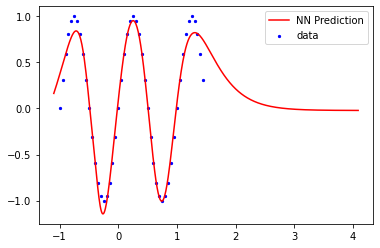

In [68]:
#=====First example: 1d function f(x)=sin(2*pi*x)
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import random

x = np.arange(-1.0, 1.5, 0.05)
random.shuffle(x)
x= x.reshape(-1, 1)

y = np.sin(2 * np.pi * x).ravel()

nn = MLPRegressor(hidden_layer_sizes=(10,), 
                  activation='logistic', solver='lbfgs')

n = nn.fit(x, y)

test_x = np.arange(-1.1, 4.1, 0.01).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=5, c='b', marker="o", label='data')
ax1.plot(test_x,test_y, c='r', label='NN Prediction')

plt.legend()
plt.show()

In [69]:
y

array([ 3.09016994e-01,  5.87785252e-01,  8.09016994e-01, -3.09016994e-01,
        8.09016994e-01, -9.51056516e-01,  1.00000000e+00, -8.09016994e-01,
        1.00000000e+00,  3.09016994e-01, -8.31523031e-15, -8.09016994e-01,
        9.51056516e-01,  2.44929360e-16, -5.87785252e-01,  1.13013901e-14,
       -9.51056516e-01,  9.51056516e-01,  8.09016994e-01, -2.78699994e-15,
        8.09016994e-01, -9.51056516e-01,  9.51056516e-01,  9.51056516e-01,
       -1.00000000e+00,  5.58058960e-15, -3.09016994e-01,  5.87785252e-01,
        1.00000000e+00,  5.87785252e-01,  5.87785252e-01,  5.87785252e-01,
        9.51056516e-01,  8.09016994e-01,  3.09016994e-01,  3.09016994e-01,
       -9.51056516e-01,  5.87785252e-01,  8.09016994e-01,  9.51056516e-01,
       -5.87785252e-01, -1.00000000e+00, -5.87785252e-01, -8.09016994e-01,
       -3.09016994e-01, -8.09016994e-01,  3.09016994e-01,  3.09016994e-01,
       -5.87785252e-01, -3.09016994e-01])

## Gradient Descent and optimizers

Try:

Notebook2 of   https://physics.bu.edu/~pankajm/MLnotebooks.html 

https://ruder.io/optimizing-gradient-descent/


## Keras (with tensorflow)

Example of classification with MNIST data

The example from the "Deep Learning with Python" 

In [71]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [72]:
train_images.shape

(60000, 28, 28)

In [73]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

9


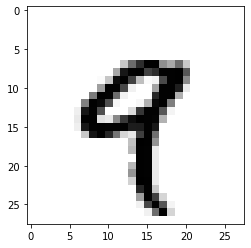

In [74]:
digit = train_images[4]
print(train_labels[4])
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Preparing the image data

Convert 

scaling it so that all values are in the [0, 1] interval.

In [75]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [82]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Build model

In [83]:
from keras import models
from keras import layers
import tensorflow.keras as keras

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Fit/Train model

In [84]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2610 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1039 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0680 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0494 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0378 - accuracy: 0.9887


### Test model

In [85]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9807
test_loss: 0.06795521080493927
test_acc: 0.9807000160217285


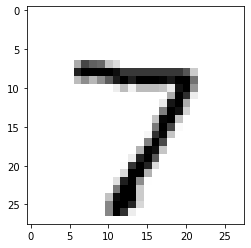

7


In [86]:
plt.imshow(test_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
y_pred=network.predict(np.array([test_images[0]]))
print(np.argmax(y_pred[0]))

## Tensorflow Detail

Let us try to understand each steps of tensorflow/keras

* Tensorflow tensor
* Keras input
* Keras layers 

In [36]:
import tensorflow as tf
import numpy as np
# To make tf.Tensor one have to use tf.constant or use operations..
#tf.Tensor([4, 6], shape=(2,), dtype=tf.int32) # Tensor must have shape and dtype.

a =tf.constant([[1,2,3]])
a[:,0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>

In [17]:
x = tf.matmul([[1]], [[2, 3]])
print(x)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)


## custom layer example

In [117]:
class SimpleDense(tf.keras.layers.Layer):
  def __init__(self, units=32):
      super(SimpleDense, self).__init__()
      self.units = units
      self._a = tf.Variable(1.0) 
      self._b = tf.Variable(1.0)  
      #self._c = tf.Variable(1.0)       
  def call(self, inputs):
      #return self._a*tf.exp(-self._b*inputs[:,1]) +self._c
      return self._a*inputs[:,1] +self._b  
    
class simplemodel(tf.keras.models.Model):
    def __init__(self, ):
        tf.keras.models.Model.__init__(self)        
        self.layer1 = SimpleDense()
    def call(self, inputs):
        x = self.layer1(inputs)
        return x 

In [119]:
model1 = simplemodel()
model1.compile(optimizer='Adam',loss='MSE')
#---simple data 
xx = np.array([[i/2,i*1.0] for i in range(0,9) ]) # xx[:,0] is dummy, xx[:,1] is the real argument
yy = 1.5*xx[:,1]+2.5
history = model1.fit(xx,yy,epochs =1000, verbose=False )
print('unscaled_training =',model1(xx) )
model1 = simplemodel()
model1.compile(optimizer='Adam',loss='MSE')
#--effect of scaling? 
xx_scaled = xx/5.0
yy_scaled = yy/5.0
history = model1.fit(xx_scaled,yy_scaled,epochs =1000, verbose=False )
print('scaled_training =',model1(xx_scaled)*5.0 )
print('target=',yy)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

unscaled_training = tf.Tensor(
[ 1.6404517  3.230742   4.8210325  6.4113226  8.001613   9.591903
 11.182194  12.772484  14.362774 ], shape=(9,), dtype=float32)

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to th